In [1]:
import numpy as np
import matplotlib.pyplot as plt
import calculate_bispectrum as cb 
import os, sys
import h5py
import pandas as pd
# add path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

import visualize_bispectrum as vb

In [2]:
seed = 0
redshifts = [20,15,10,5,1,0]
objs = {}
for z in [10, 1]:
    objs[z] = vb.BispectrumVariation_AS(seed, z)

ValueError: cannot reshape array of size 50 into shape (4)

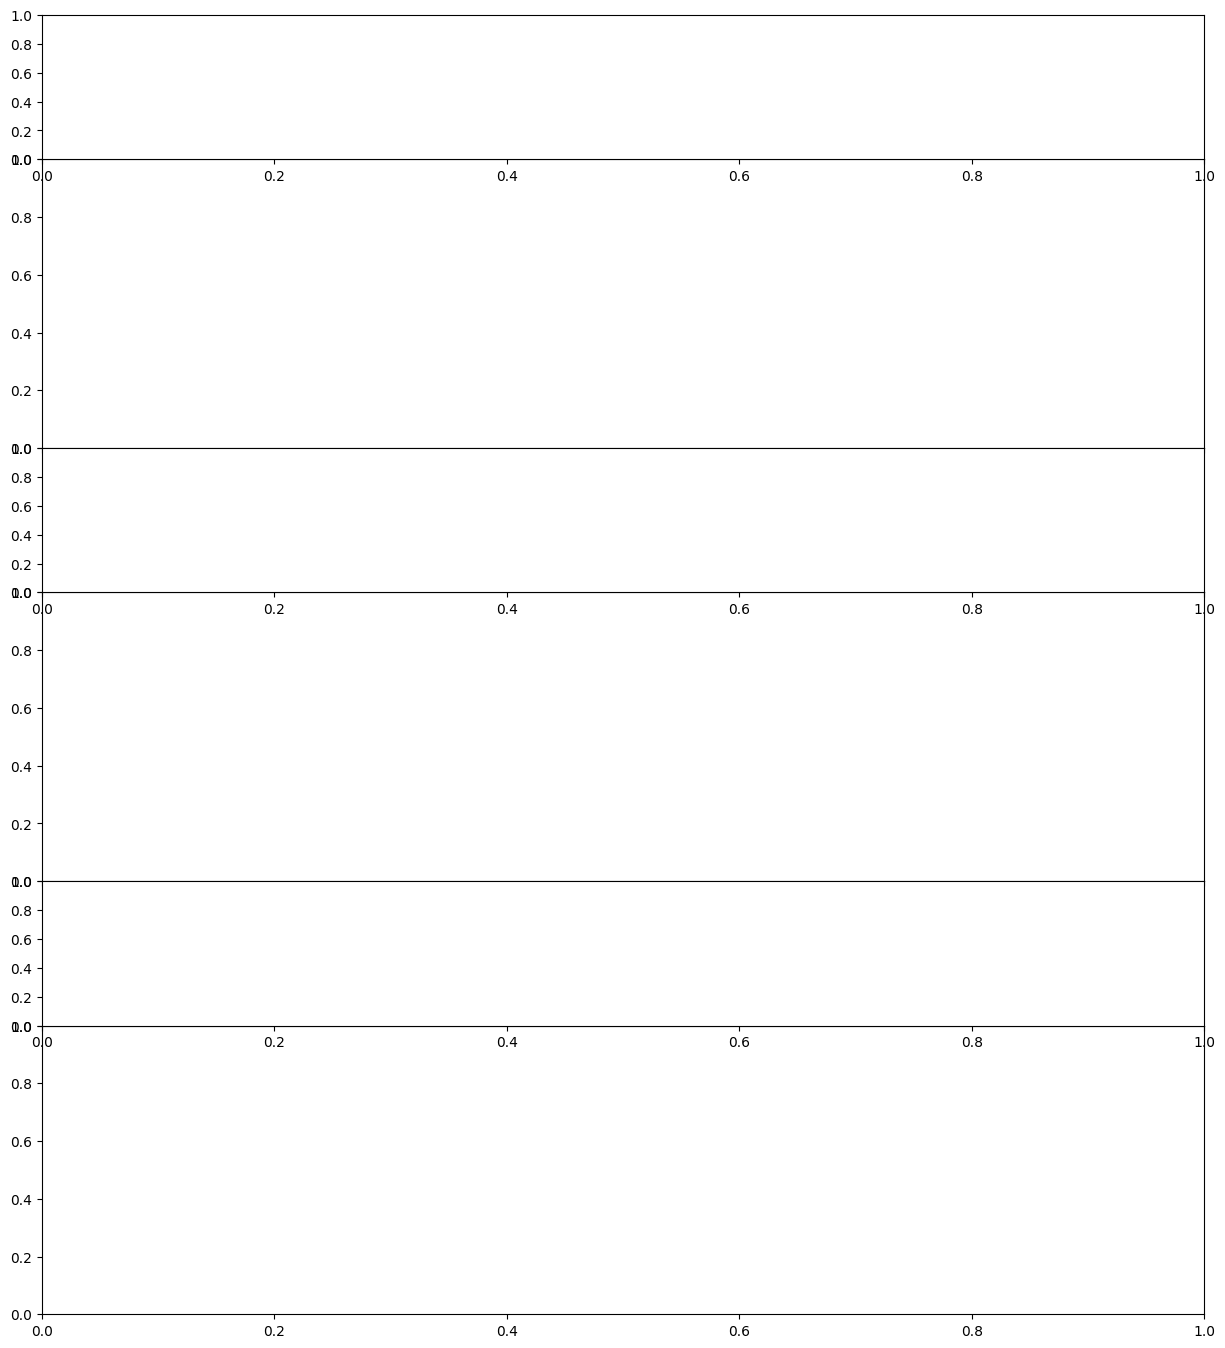

In [3]:
for obj in objs.values():
    obj.plot_bispectra_in_same_plot()

In [4]:
# Comparing difference cubes

# for seed0

bispectrumlink = "/mn/stornext/d10/data/johanmkr/simulations/bispectra_analysis/"

gr_z10 = pd.read_pickle(bispectrumlink + "z_10/seed0000/2.215e-09_gr.pkl")
gr_z1 = pd.read_pickle(bispectrumlink + "z_1/seed0000/2.215e-09_gr.pkl")
gr_diff = pd.read_pickle(bispectrumlink + "scaled/seed0000/SCALED_2.215e-09_gr.pkl")

newton_z10 = pd.read_pickle(bispectrumlink + "z_10/seed0000/2.215e-09_newton.pkl")
newton_z1 = pd.read_pickle(bispectrumlink + "z_1/seed0000/2.215e-09_newton.pkl")
newton_diff = pd.read_pickle(bispectrumlink + "scaled/seed0000/SCALED_2.215e-09_newton.pkl")

# Relative difference:
z10_diff = np.abs((gr_z10["Q_eq"] - newton_z10["Q_eq"]) / gr_z10["Q_eq"])
z1_diff = np.abs((gr_z1["Q_eq"] - newton_z1["Q_eq"]) / gr_z1["Q_eq"])
diff_diff = np.abs((gr_diff["Q_eq"] - newton_diff["Q_eq"]) / gr_diff["Q_eq"])

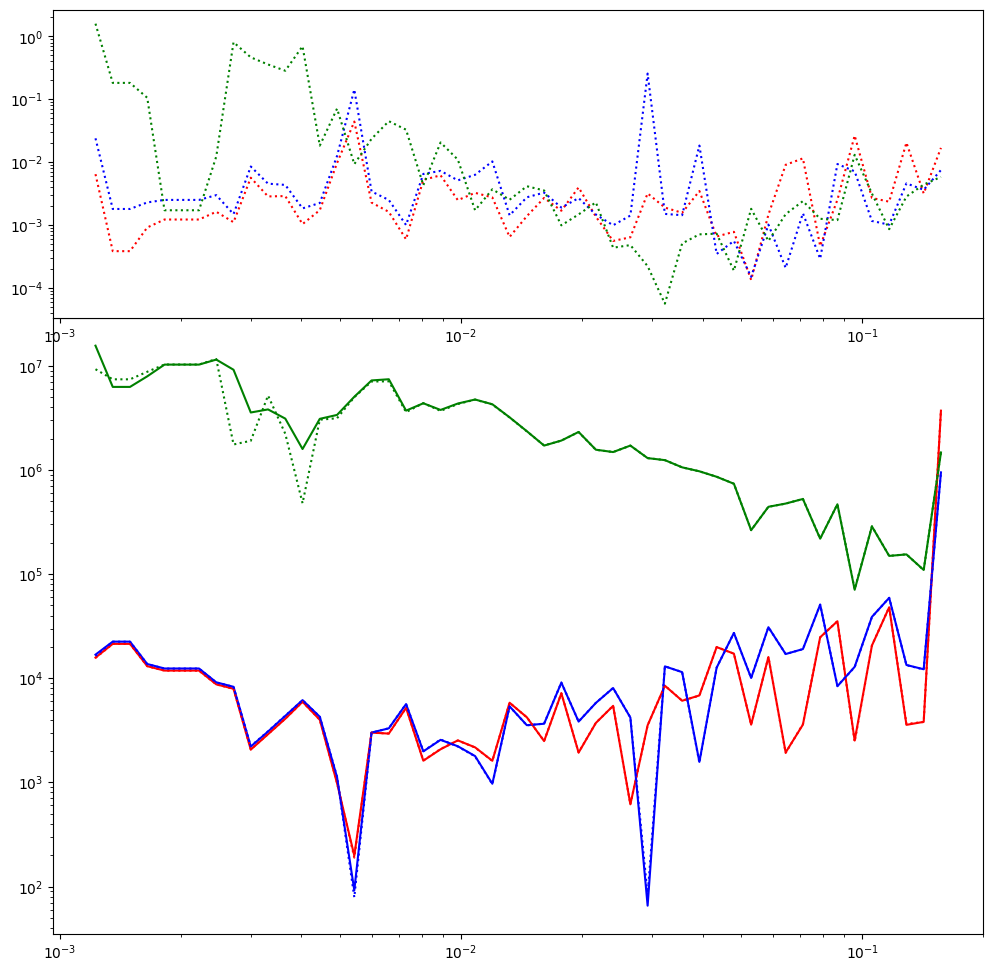

In [5]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(12,8))
ax.loglog(gr_z10["k"], abs(gr_z10["Q_eq"]), color="red", ls="-", label="GR z=10")
ax.loglog(gr_z1["k"], abs(gr_z1["Q_eq"]), color="blue", ls="-", label="GR z=1")
ax.loglog(gr_diff["k"], abs(gr_diff["Q_eq"]), color="green", ls="-", label="GR scaled")

ax.loglog(newton_z10["k"], abs(newton_z10["Q_eq"]), color="red", ls=":", label="Newton z=10")
ax.loglog(newton_z1["k"], abs(newton_z1["Q_eq"]), color="blue", ls=":", label="Newton z=1")
ax.loglog(newton_diff["k"], abs(newton_diff["Q_eq"]), color="green", ls=":", label="Newton scaled")

tx = ax.inset_axes([0.0, 1, 1, 0.5])
tx.loglog(gr_z10["k"], z10_diff, color="red", ls=":", label="z=10")
tx.loglog(gr_z1["k"], z1_diff, color="blue", ls=":", label="z=1")
tx.loglog(gr_diff["k"], diff_diff, color="green", ls=":", label="scaled")


In [ ]:
gr_z1.head

<bound method NDFrame.head of            k          B_eq           Q_eq          B_sq         Q_sq  \
0   0.001227  2.565734e+05   16840.746278  1.135618e+05  7720.407849   
1   0.001355  2.682233e+05   22460.410861  1.096894e+05  8769.988605   
2   0.001496  2.682233e+05   22460.410861  1.096894e+05  8769.988605   
3   0.001652  7.999242e+04   13690.605420  4.124081e+04  5212.540831   
4   0.001824  5.207104e+04   12402.350497  3.068604e+03   475.365066   
5   0.002013  5.207104e+04   12402.350497  3.068604e+03   475.365066   
6   0.002223  5.207104e+04   12402.350497  3.068604e+03   475.365066   
7   0.002454  3.053078e+04    9134.286868 -2.704040e+03  -480.706233   
8   0.002710  1.059458e+04    8272.053371  1.472673e+03   457.449717   
9   0.002992 -9.857557e+02   -2208.755036 -6.856629e+03 -2967.837844   
10  0.003303 -1.048557e+03   -3077.506865 -9.449671e+03 -6081.573361   
11  0.003647 -9.715102e+02   -4347.431182 -5.951815e+03 -3729.867652   
12  0.004027  6.607831e+02    6163

In [6]:
# Checking averages

avg_path = "/mn/stornext/d10/data/johanmkr/simulations/bispectra_analysis/average_bispectra/"
B_avg_path = lambda kind, A_s, gravity: avg_path + f"B_avg_{kind}_{A_s:.2e}_{gravity.lower()}.pkl"


z10gr = pd.read_pickle(B_avg_path("z10", 2.215e-9, "GR"))
z10newton = pd.read_pickle(B_avg_path("z10", 2.215e-9, "Newton"))
z1gr = pd.read_pickle(B_avg_path("z1", 2.215e-9, "GR"))
z1newton = pd.read_pickle(B_avg_path("z1", 2.215e-9, "Newton"))
scaled_gr = pd.read_pickle(B_avg_path("scaled", 2.215e-9, "GR"))
scaled_newton = pd.read_pickle(B_avg_path("scaled", 2.215e-9, "Newton"))


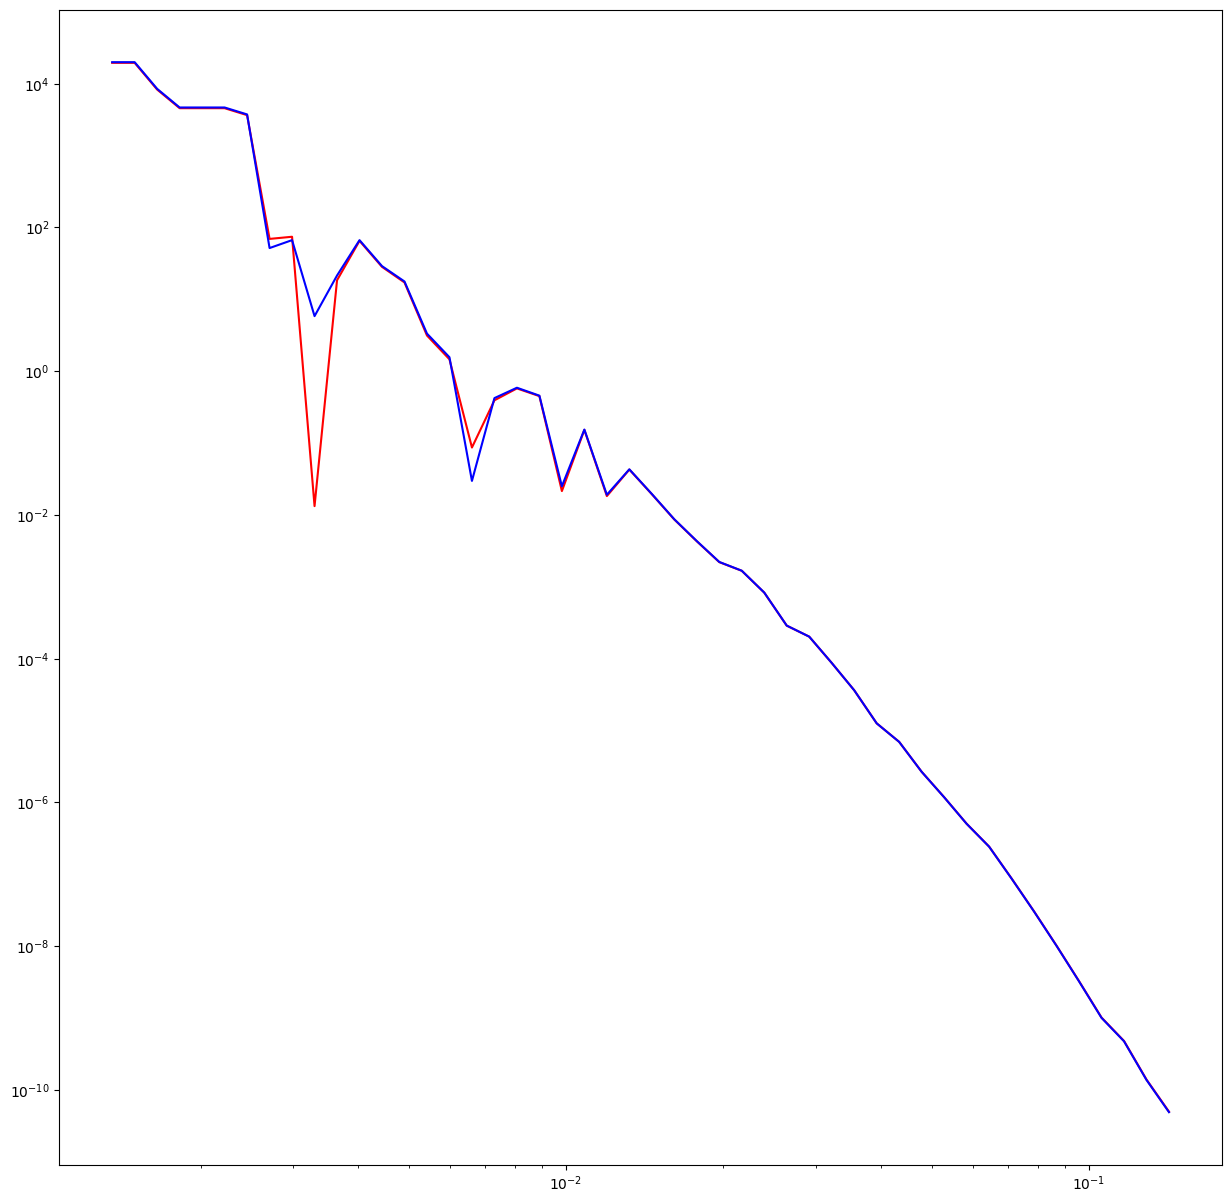

In [9]:
# Plot average bispectra
fig, ax = plt.subplots(1, 1, figsize=(15,15))
ax.loglog(z1gr["k"][1:-1], abs(z1gr["B_eq_avg"][1:-1]), color="red", ls="-", label="GR z=10")
# ax.fill_between(scaled_gr["k"], abs(scaled_gr["Q_eq_avg"]) + scaled_gr["B_eq_std"], abs(scaled_gr["Q_eq_avg"]) - scaled_gr["Q_eq_std"], color="red", alpha=0.3)

ax.loglog(z1newton["k"][1:-1], abs(z1newton["B_eq_avg"][1:-1]), color="blue", ls="-", label="GR z=10")
# ax.fill_between(scaled_newton["k"], abs(scaled_newton["Q_eq_avg"]) + scaled_newton["B_eq_std"], abs(scaled_newton["Q_eq_avg"]) - scaled_newton["Q_eq_std"], color="blue", alpha=0.3)


In [ ]:
print(z10gr["max_seed"])

0     250
1     250
2     250
3     250
4     250
5     250
6     250
7     250
8     250
9     250
10    250
11    250
12    250
13    250
14    250
15    250
16    250
17    250
18    250
19    250
20    250
21    250
22    250
23    250
24    250
25    250
26    250
27    250
28    250
29    250
30    250
31    250
32    250
33    250
34    250
35    250
36    250
37    250
38    250
39    250
40    250
41    250
42    250
43    250
44    250
45    250
46    250
47    250
48    250
49    250
Name: max_seed, dtype: int64


Trial 0 finished with value: 0.003129156306385994 and parameters: {'hidden': 12, 'dr': 0.006667864032948301, 'optimizer': 'Adam', 'lr': 0.005538376177654741}. Best is trial 0 with value: 0.003129156306385994.
